Sentiment Analysis with Neural Networks

Importing libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

Importing dataset

In [95]:
df=pd.read_csv("Dataset.csv")

In [96]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


No. of rows and columns

In [97]:
df.shape

(50000, 2)

Check for missing values

In [98]:
df.isnull().sum()
#No missing values

review       0
sentiment    0
dtype: int64

More information

In [99]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Data visualisation

In [101]:
df["sentiment"].value_counts()
#Equal no. of positive and negative sentiments

positive    25000
negative    25000
Name: sentiment, dtype: int64

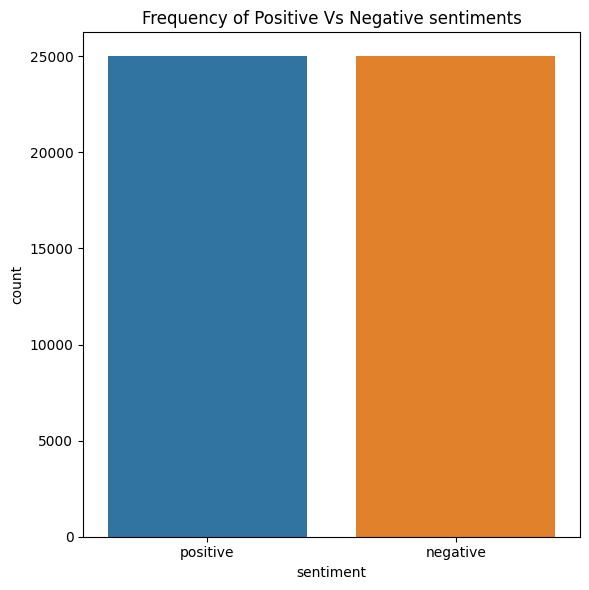

In [102]:
#Countplot for positive Vs negative sentiments
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="sentiment")
plt.title("Frequency of Positive Vs Negative sentiments")
plt.tight_layout()
plt.show()

Data cleaning and pre-processing

In [103]:
df["review"][0]
#Text contains numbers, punctuations, HTML tags, and brackets.

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [104]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
review_list=list(df.review)

In [106]:
#Remove HTML tags
rem_tag=re.compile(r"<[^>]+>")
def remove_htmltags(message):
    return rem_tag.sub(" ", message)

In [107]:
def clean_data(text):
    text=text.lower() #lowercase
    text=remove_htmltags(text) #remove HTML tags
    text=re.sub("[^a-zA-Z]", " ", text) #filtering out punctuations and numbers
    text=re.sub(r"\s+[a-zA-Z]\s+", " ", text)
    text=re.sub(r"\s+", " ", text)

    #removal of stopwords
    stop_words=set(stopwords.words("english"))
    text=[word for word in text.split(" ") if word not in stop_words]
    text=" ".join(text)

    return text

In [108]:
reviews=[]
for text in review_list:
    reviews.append(clean_data(text))

Examples of some pre-processed reviews

In [109]:
reviews[1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done '

In [110]:
reviews[10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed find jokes oddness funny anymore low budget film thats never problem pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking something similar better try brother another planet '

Assign labels to sentiment
1. 1 for positive
2. 0 for negative

In [111]:
df["sentiment"]=df["sentiment"].map({"positive":1, "negative":0})

Cleaned dataset

In [112]:
data=pd.DataFrame({"review":reviews, "sentiment":df["sentiment"]})

Training and testing

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X=np.array(data["review"])
y=np.array(data["sentiment"])

In [115]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

Preparing embedding layer

1. Embedding layer converts the textual data into numeric form.
2. The layer is used as the first layer for the deep learning models in Keras.

In [ ]:
!pip install tensorflow

In [117]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Dense

In [118]:
#Converting texts to sequences
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [119]:
vocab_length = len(word_tokenizer.word_index) + 1

In [120]:
#Padding all reviews to fixed length 100

X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [121]:
#Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('data.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [122]:
#Create Embedding Matrix having 100 columns

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Model Training with LSTM

Recurrent Neural Network (Long short-term memory)

In [123]:
from keras.layers import LSTM

In [124]:
#Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=100 , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [125]:
#Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9070300   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,187,677
Trainable params: 117,377
Non-trainable params: 9,070,300
_________________________________________________________________
None


In [126]:
#Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 140s 549ms/step - loss: 0.5040 - acc: 0.7548 - val_loss: 0.4215 - val_acc: 0.8158
Epoch 2/6
250/250 [==============================] - 93s 374ms/step - loss: 0.4122 - acc: 0.8151 - val_loss: 0.3851 - val_acc: 0.8386
Epoch 3/6
250/250 [==============================] - 87s 348ms/step - loss: 0.3822 - acc: 0.8334 - val_loss: 0.3529 - val_acc: 0.8486
Epoch 4/6
250/250 [==============================] - 88s 353ms/step - loss: 0.3518 - acc: 0.8483 - val_loss: 0.3563 - val_acc: 0.8540
Epoch 5/6
250/250 [==============================] - 86s 346ms/step - loss: 0.3354 - acc: 0.8597 - val_loss: 0.3221 - val_acc: 0.8615
Epoch 6/6
250/250 [==============================] - 87s 348ms/step - loss: 0.3183 - acc: 0.8704 - val_loss: 0.3227 - val_acc: 0.8637


In [127]:
#Accuracy of the model

score = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Accuracy of LSTM Model:", score[1])

313/313 [==============================] - 18s 59ms/step - loss: 0.3347 - acc: 0.8617
Accuracy: 0.8616999983787537


Making predictions on IMBD Reviews

In [128]:
#Loading sample dataset
sample=pd.read_csv("IMDB_reviews.csv")
sample.head()

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


In [129]:
#Preprocessing sample text with clean_data(text) function
unseen_reviews=sample['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = clean_data(review)
  unseen_processed.append(review)

In [130]:
#Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

#Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [131]:
#Passing tokenised instance to the LSTM model
unseen_sentiments = lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 1s 576ms/step


array([[0.91302997],
       [0.9927518 ],
       [0.15483843],
       [0.35761905],
       [0.98278224],
       [0.01608493]], dtype=float32)

In [132]:
#Final prediction of sentiments
sample['Predicted Sentiments']=np.round(unseen_sentiments*10,1)

df_prediction_sentiments =pd.DataFrame(sample['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(sample['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(sample['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(sample['IMDb Rating'], columns = ['IMDb Rating'])


predict=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

predict.to_csv("Predictions.csv", sep=',', encoding='UTF-8')

predict

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,9.1
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,1.5
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,3.6
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.8
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.2
